In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [68]:
df = pd.read_csv("df.csv")
df

,Unnamed: 0,Card Number,Date,Amount,CBK
0,0,536518******2108,2015-05-01 00:01:54,36.54,No
1,1,536518******2108,2015-05-01 00:03:46,36.54,No
2,2,453211******1239,2015-05-01 00:08:50,69.00,No
3,3,548827******1705,2015-05-01 00:27:00,193.43,No
4,4,531681******9778,2015-05-01 01:32:46,132.00,No
...,...,...,...,...,...
11122,11123,514868******7409,2015-05-30 23:07:01,53.00,No
11123,11124,439354******5281,2015-05-30 23:08:47,15.00,No
11124,11125,549167******1648,2015-05-30 23:15:24,20.00,No
11125,11126,518759******8384,2015-05-30 23:17:41,70.00,No


In [69]:
df.head()

,Unnamed: 0,Card Number,Date,Amount,CBK
0,0,536518******2108,2015-05-01 00:01:54,36.54,No
1,1,536518******2108,2015-05-01 00:03:46,36.54,No
2,2,453211******1239,2015-05-01 00:08:50,69.00,No
3,3,548827******1705,2015-05-01 00:27:00,193.43,No
4,4,531681******9778,2015-05-01 01:32:46,132.00,No


In [70]:
def normalize(df):
    return (df - df.mean()) / df.std()

In [91]:
df = df[['Card Number', 'Date', 'Amount', 'CBK']]
df = df.sample(frac = 1) 
df

card_numbers_to_idx = { v:k for k,v in enumerate(np.unique(df['Card Number'].values))}
df['Card Number'].replace(card_numbers_to_idx, inplace=True)
df['Card Number'] = normalize(df['Card Number'])

df['Date'] = df['Date'].values.astype("datetime64[s]")
df['Date'] = normalize(df['Date'])


df['Amount'] = normalize(df['Amount'])

df.replace({'No': 0, 'Yes': 1}, inplace=True)
df

,Card Number,Date,Amount,CBK
10874,-0.892245,1.480490,0.427371,0
912,0.798928,-1.605286,-0.138308,0
175,-0.182683,-1.605286,0.394773,1
2437,-0.470384,-0.062398,0.717281,0
9709,1.615073,1.480490,-0.520141,0
...,...,...,...,...
10662,-0.121938,1.480490,-0.880761,0
1048,-0.015727,-1.605286,0.172815,0
10271,0.731475,1.480490,0.017254,0
4060,0.368122,-0.062398,-0.332760,0


In [92]:
df.describe()

,Card Number,Date,Amount,CBK
count,1.112700e+04,1.112700e+04,1.112700e+04,11127.000000
mean,1.174979e-16,1.080313e-09,-1.021720e-17,0.051406
std,1.000000e+00,1.000000e+00,1.000000e+00,0.220835
min,-1.725161e+00,-1.605286e+00,-9.090447e-01,0.000000
25%,-8.641086e-01,-6.239774e-02,-5.272118e-01,0.000000
50%,-4.477255e-04,-6.239774e-02,-2.160886e-01,0.000000
75%,8.647039e-01,-6.239774e-02,1.728153e-01,0.000000
max,1.725383e+00,1.480490e+00,1.973115e+01,1.000000


In [94]:
fraud = df[df['CBK'] == 1] 
valid = df[df['CBK'] == 0] 
ratio = len(fraud)/float(len(valid)) 
print(ratio)
print(len(fraud))
print(len(valid))

0.0541923259118901
572
10555


In [95]:
print(fraud['Amount'].describe())
print('-------------------')
print(valid['Amount'].describe())

count    572.000000
mean       0.379998
std        1.169056
min       -0.817193
25%       -0.428218
50%        0.017254
75%        0.563487
max        6.239717
Name: Amount, dtype: float64
-------------------
count    10555.000000
mean        -0.020593
std          0.985903
min         -0.909045
25%         -0.527212
50%         -0.216089
75%          0.172815
max         19.731148
Name: Amount, dtype: float64


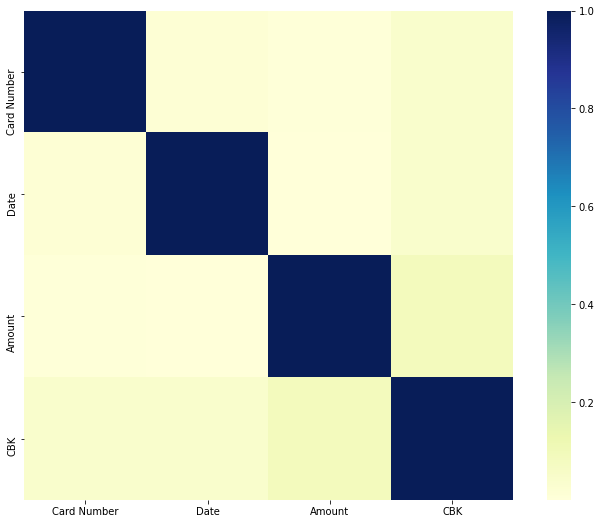

In [96]:
correlation = df.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(correlation, vmax = 1, square = True, cmap="YlGnBu") 
plt.show()

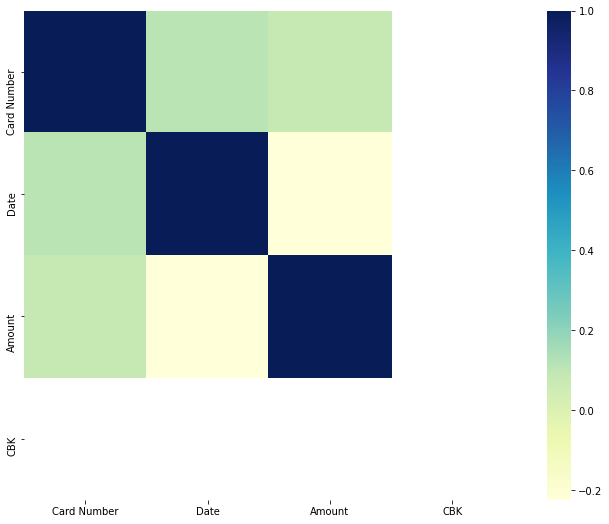

In [97]:
correlation = fraud.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(correlation, vmax = 1, square = True, cmap="YlGnBu") 
plt.show()

In [100]:
from sklearn.model_selection import train_test_split
X=df[['Card Number', 'Date', 'Amount']]  # Features
y=df['CBK']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [102]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9784327821711
